In [234]:
import numpy as np
from sklearn.datasets import make_classification

In [235]:
X,y=make_classification( n_samples=100,
    n_features=2,
    n_informative=1,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,    
    class_sep=20,
    hypercube=False,
    random_state=41,
    )

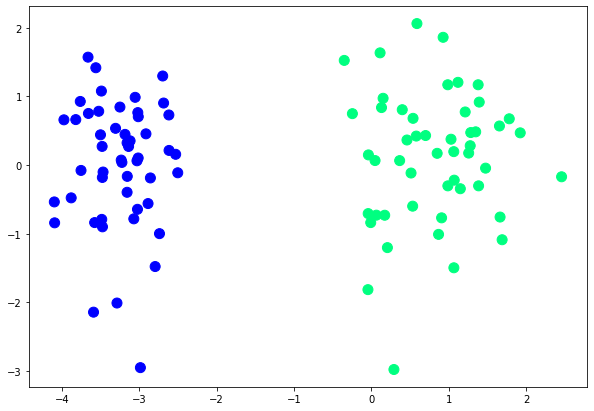

In [236]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,7])
plt.scatter(X[:,0],X[:,1],c=y,cmap="winter",s=100)
plt.show()

In [245]:
def logloss(X,y):
    X=np.insert(X,0,1,axis=1)
    
    weight=np.ones(X.shape[1])
    lr=0.5
    for i in range(25000):
        yhat=sig(X,weight)
        l=y-yhat
        weight=weight+(lr/100)*np.dot(X.T,l)
    return weight[0],weight[1:]
        

In [246]:
def sig(a,b):
    c=[]
    for i in range(100):
        z=np.dot(a[i],b)
        e=1/(1+np.exp(-z))
        c.append(e)
    return c
        
    
    

In [247]:
inter_,coeff_=logloss(X,y)

In [248]:
slope=-(coeff_[0]/coeff_[1])
b=-(inter_/coeff_[1])

In [249]:
x_input=np.linspace(-4,2,100)
y_input=slope*x_input+b

(-3.0, 2.0)

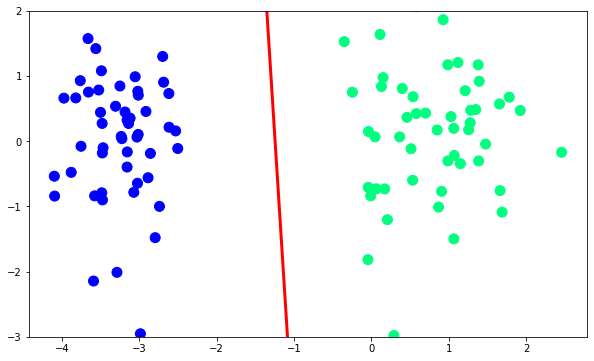

In [250]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)




In [243]:
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [255]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [256]:
x_input1 = np.linspace(-4,2,100)
y_input1 = m*x_input + b

(-3.0, 2.0)

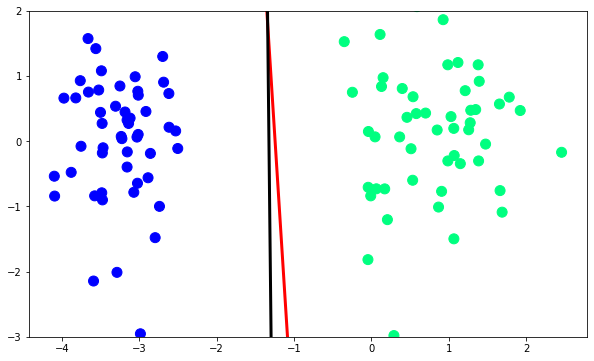

In [257]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)